In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from time import time
import cv2
from random import randint
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.15.0


In [ ]:
#@title Acceder al Drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# directorio local en Google Drive
path = 'gdrive/My Drive/IA' #@param {type:"string"}
path_entrenamiento = '/train'  #@param {type:"string"}
path_prueba = '/test'  #@param {type:"string"}

imagPath_train = path + path_entrenamiento
imagPath_test = path + path_prueba

Mounted at /content/gdrive


In [ ]:
TRAINING_DIR = imagPath_train
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
VALIDATION_DIR = imagPath_test
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(350,350),
    class_mode='categorical',
    batch_size=8
)

Found 239 images belonging to 7 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(350,350),
    class_mode='categorical',
    batch_size=8
)

Found 30 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(350, 350, 3)),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Dropout(0.25),
    # 2nda capa
    tf.keras.layers.Conv2D(64, (3,3),padding = 'Same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    # 3era capa
    tf.keras.layers.Conv2D(128, (3,3),padding = 'Same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    # 4ta capa
    tf.keras.layers.Conv2D(128, (3,3),padding = 'Same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    # 5ta capa
    tf.keras.layers.Conv2D(128, (3,3),padding = 'Same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    # Se aplanan los parametros para insertar en el DNN
    tf.keras.layers.Flatten(),
    # Capa oculta de 512 neuronas
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
optimiser = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 346, 346, 32)      2432      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 115, 115, 32)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 115, 115, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 115, 115, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 57, 57, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 57, 57, 64)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=6)

epochs = 10

history = model.fit_generator(train_generator,
                              epochs = epochs, validation_data = validation_generator,
                              verbose = 1,validation_steps=3)

Epoch 1/10
30/30 [==============================] - 60s 2s/step - loss: 0.5215 - accuracy: 0.8033 - val_loss: 0.6049 - val_accuracy: 0.7917
Epoch 2/10
30/30 [==============================] - 61s 2s/step - loss: 0.4691 - accuracy: 0.8326 - val_loss: 0.2951 - val_accuracy: 0.8333
Epoch 3/10
30/30 [==============================] - 59s 2s/step - loss: 0.3774 - accuracy: 0.8536 - val_loss: 0.3185 - val_accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 59s 2s/step - loss: 0.3288 - accuracy: 0.9038 - val_loss: 0.2235 - val_accuracy: 0.8750
Epoch 5/10
30/30 [==============================] - 65s 2s/step - loss: 0.1903 - accuracy: 0.9498 - val_loss: 3.2254 - val_accuracy: 0.6667
Epoch 6/10
30/30 [==============================] - 61s 2s/step - loss: 0.6441 - accuracy: 0.8159 - val_loss: 0.3833 - val_accuracy: 0.8750
Epoch 7/10
30/30 [==============================] - 57s 2s/step - loss: 0.4257 - accuracy: 0.8326 - val_loss: 0.4073 - val_accuracy: 0.8750
Epoch 8/10
30/30 [==

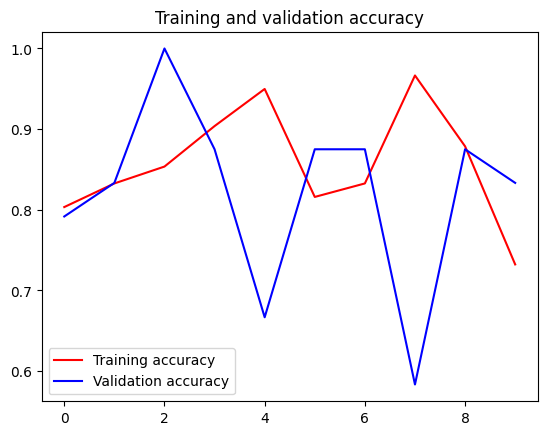

<Figure size 640x480 with 0 Axes>

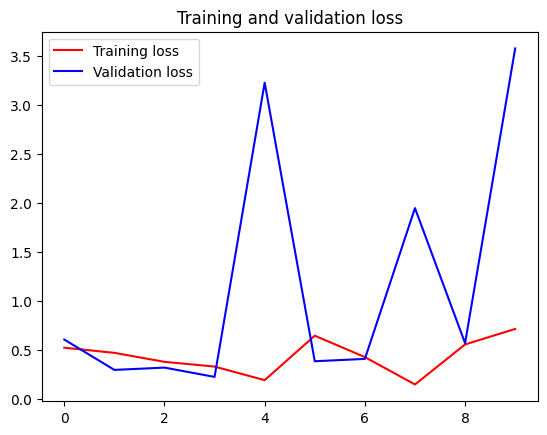

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

4/4 [==============================] - 2s 507ms/step


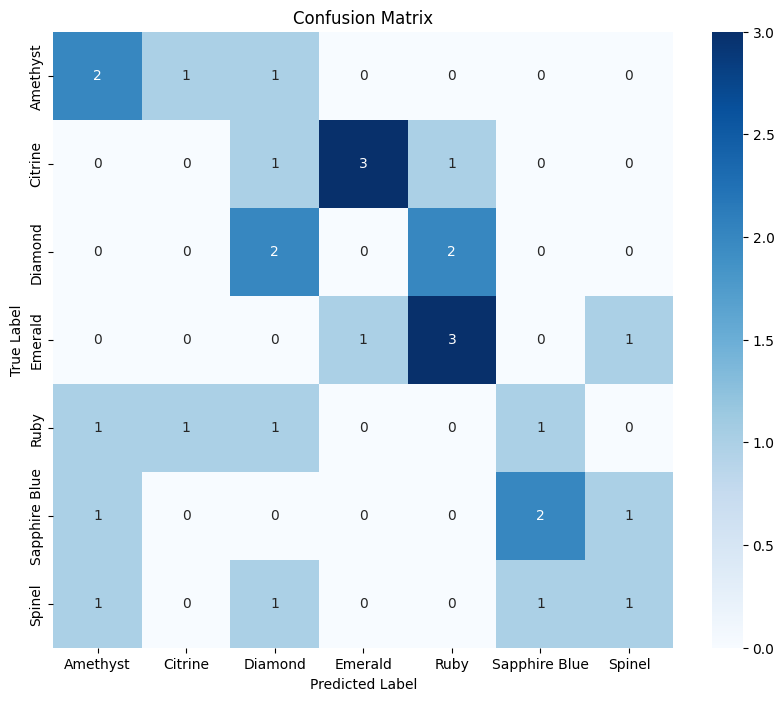

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Realiza predicciones en el conjunto de validación
val_steps = validation_generator.samples // validation_generator.batch_size
predictions = model.predict_generator(validation_generator, steps=val_steps+1, verbose=1)

# Convierte las predicciones en etiquetas de clase
predicted_classes = np.argmax(predictions, axis=1)

# Obtiene las etiquetas verdaderas del conjunto de validación
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Construye la matriz de confusión
conf_matrix = confusion_matrix(true_classes[:len(predicted_classes)], predicted_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()